In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
!pip install --upgrade ipython
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.7/826.7 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.34.0 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.5, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [2]:
import kagglehub

path = kagglehub.dataset_download("frtgnn/dunnhumby-the-complete-journey")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dunnhumby-the-complete-journey


In [3]:
import os
import pandas as pd
path = "/kaggle/input/dunnhumby-the-complete-journey"

files = os.listdir(path)

dataframes = {}

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(path, file)
        df_name = file.replace('.csv', '')
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"Loaded {file} into DataFrame '{df_name}'")
        print(dataframes[df_name].head())

Loaded campaign_table.csv into DataFrame 'campaign_table'
  DESCRIPTION  household_key  CAMPAIGN
0       TypeA             17        26
1       TypeA             27        26
2       TypeA            212        26
3       TypeA            208        26
4       TypeA            192        26
Loaded causal_data.csv into DataFrame 'causal_data'
   PRODUCT_ID  STORE_ID  WEEK_NO display mailer
0       26190       286       70       0      A
1       26190       288       70       0      A
2       26190       289       70       0      A
3       26190       292       70       0      A
4       26190       293       70       0      A
Loaded coupon.csv into DataFrame 'coupon'
    COUPON_UPC  PRODUCT_ID  CAMPAIGN
0  10000089061       27160         4
1  10000089064       27754         9
2  10000089073       28897        12
3  51800009050       28919        28
4  52100000076       28929        25
Loaded campaign_desc.csv into DataFrame 'campaign_desc'
  DESCRIPTION  CAMPAIGN  START_DAY  END_DAY
0   

In [4]:
transaction = dataframes['transaction_data']
transaction

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.0,0.0
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.0,0.0
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.0,0.0
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.0,0.0


In [5]:
product = dataframes['product']
product

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [6]:
transaction.drop(columns=['RETAIL_DISC','TRANS_TIME','WEEK_NO','COUPON_DISC','COUPON_MATCH_DISC','DAY','SALES_VALUE','STORE_ID'],axis=1,inplace=True)
transaction

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY
0,2375,26984851472,1004906,1
1,2375,26984851472,1033142,1
2,2375,26984851472,1036325,1
3,2375,26984851472,1082185,1
4,2375,26984851472,8160430,1
...,...,...,...,...
2595727,1598,42305362535,92130,1
2595728,1598,42305362535,114102,1
2595729,1598,42305362535,133449,1
2595730,1598,42305362535,6923644,1


In [7]:
product.drop(columns=['MANUFACTURER','DEPARTMENT','BRAND','CURR_SIZE_OF_PRODUCT'], axis=1, inplace=True)
product

,PRODUCT_ID,COMMODITY_DESC,SUB_COMMODITY_DESC
0,25671,FRZN ICE,ICE - CRUSHED/CUBED
1,26081,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION
2,26093,BREAD,BREAD:ITALIAN/FRENCH
3,26190,FRUIT - SHELF STABLE,APPLE SAUCE
4,26355,COOKIES/CONES,SPECIALTY COOKIES
...,...,...,...
92348,18293142,BOOKSTORE,PAPERBACK BOOKS
92349,18293439,BOOKSTORE,CHILDRENS LOW END
92350,18293696,BOOKSTORE,PAPERBACK BEST SELLER
92351,18294080,BOOKSTORE,PAPERBACK BOOKS


In [8]:
transaction = transaction.merge(product, on='PRODUCT_ID', how='left')
transaction

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,COMMODITY_DESC,SUB_COMMODITY_DESC
0,2375,26984851472,1004906,1,POTATOES,POTATOES RUSSET (BULK&BAG)
1,2375,26984851472,1033142,1,ONIONS,ONIONS SWEET (BULK&BAG)
2,2375,26984851472,1036325,1,VEGETABLES - ALL OTHERS,CELERY
3,2375,26984851472,1082185,1,TROPICAL FRUIT,BANANAS
4,2375,26984851472,8160430,1,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS
...,...,...,...,...,...,...
2595727,1598,42305362535,92130,1,MARGARINES,MARGARINE: TUBS AND BOWLS
2595728,1598,42305362535,114102,1,BEERS/ALES,BEERALEMALT LIQUORS
2595729,1598,42305362535,133449,1,BEERS/ALES,BEERALEMALT LIQUORS
2595730,1598,42305362535,6923644,1,BEERS/ALES,BEERALEMALT LIQUORS


# DataProcessing

In [9]:
Q1 = transaction['QUANTITY'].quantile(0.25)
Q3 = transaction['QUANTITY'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = transaction[(transaction['QUANTITY'] < lower_bound) | (transaction['QUANTITY'] > upper_bound)]
print(outliers)

         household_key    BASKET_ID  PRODUCT_ID  QUANTITY  \
5                 2375  26984851516      826249         2   
16                1130  26984905972      833715         2   
17                1130  26984905972      866950         2   
18                1130  26984905972     1022843         2   
20                1130  26984905972     1071333         2   
...                ...          ...         ...       ...   
2595651           2125  42291245957     1977026         2   
2595666           2125  42291245957     6607550         2   
2595685           1037  42291971719       72816         2   
2595704           1369  42302712189      959737         2   
2595720           1598  42305362497      114397         2   

                 COMMODITY_DESC            SUB_COMMODITY_DESC  
5        BAKED BREAD/BUNS/ROLLS                HAMBURGER BUNS  
16                         SOUP      RAMEN NOODLES/RAMEN CUPS  
17                         SOUP      RAMEN NOODLES/RAMEN CUPS  
18         

In [10]:
upper_threshold = transaction["QUANTITY"].quantile(0.99)
transaction_cleaned = transaction[transaction["QUANTITY"] <= upper_threshold]
transaction_cleaned

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,COMMODITY_DESC,SUB_COMMODITY_DESC
0,2375,26984851472,1004906,1,POTATOES,POTATOES RUSSET (BULK&BAG)
1,2375,26984851472,1033142,1,ONIONS,ONIONS SWEET (BULK&BAG)
2,2375,26984851472,1036325,1,VEGETABLES - ALL OTHERS,CELERY
3,2375,26984851472,1082185,1,TROPICAL FRUIT,BANANAS
4,2375,26984851472,8160430,1,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS
...,...,...,...,...,...,...
2595727,1598,42305362535,92130,1,MARGARINES,MARGARINE: TUBS AND BOWLS
2595728,1598,42305362535,114102,1,BEERS/ALES,BEERALEMALT LIQUORS
2595729,1598,42305362535,133449,1,BEERS/ALES,BEERALEMALT LIQUORS
2595730,1598,42305362535,6923644,1,BEERS/ALES,BEERALEMALT LIQUORS


In [11]:
transaction_cleaned = transaction_cleaned[transaction_cleaned['QUANTITY'] > 0]

In [12]:
transaction_cleaned

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,COMMODITY_DESC,SUB_COMMODITY_DESC
0,2375,26984851472,1004906,1,POTATOES,POTATOES RUSSET (BULK&BAG)
1,2375,26984851472,1033142,1,ONIONS,ONIONS SWEET (BULK&BAG)
2,2375,26984851472,1036325,1,VEGETABLES - ALL OTHERS,CELERY
3,2375,26984851472,1082185,1,TROPICAL FRUIT,BANANAS
4,2375,26984851472,8160430,1,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS
...,...,...,...,...,...,...
2595727,1598,42305362535,92130,1,MARGARINES,MARGARINE: TUBS AND BOWLS
2595728,1598,42305362535,114102,1,BEERS/ALES,BEERALEMALT LIQUORS
2595729,1598,42305362535,133449,1,BEERS/ALES,BEERALEMALT LIQUORS
2595730,1598,42305362535,6923644,1,BEERS/ALES,BEERALEMALT LIQUORS


In [13]:
user_product_matrix = transaction_cleaned.pivot_table(index='household_key', columns='PRODUCT_ID', values='QUANTITY', aggfunc='sum', fill_value=0)
print(user_product_matrix.head())

PRODUCT_ID     25671     26081     26093     26190     26355     26426     \
household_key                                                               
1                     0         0         0         0         0         0   
2                     0         0         0         0         0         0   
3                     0         0         0         0         0         0   
4                     0         0         0         0         0         0   
5                     0         0         0         0         0         0   

PRODUCT_ID     26540     26601     26636     26691     ...  18273019  \
household_key                                          ...             
1                     0         0         0         0  ...         0   
2                     0         0         0         0  ...         0   
3                     0         0         0         0  ...         0   
4                     0         0         0         0  ...         0   
5                     0     

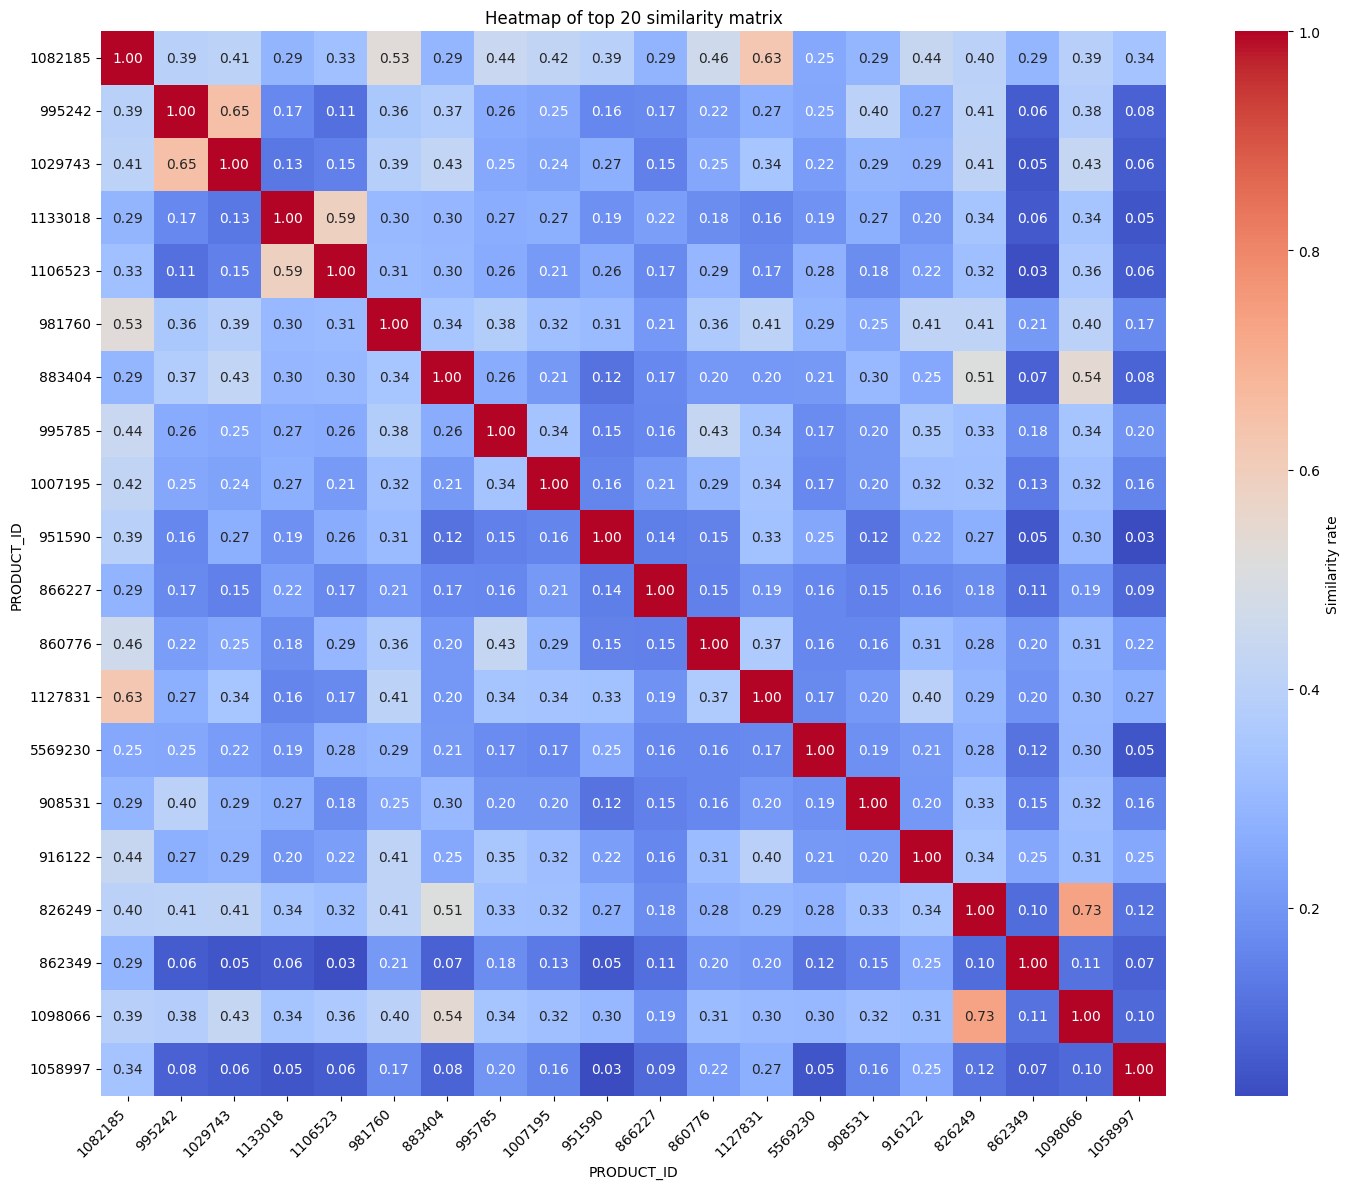

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


# Giới hạn ma trận để tập trung vào top 20 sản phẩm phổ biến nhất
top_20_products = user_product_matrix.sum().sort_values(ascending=False).index[:20]
top_20_matrix = user_product_matrix[top_20_products].T  # Chuyển ma trận để tính cosine similarity

# Tính toán ma trận tương đồng Cosine giữa các sản phẩm
similarity_matrix = cosine_similarity(top_20_matrix)

# Chuyển thành DataFrame
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=top_20_products,
    columns=top_20_products
)

# Vẽ heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    similarity_df,
    annot=True,  # Hiển thị giá trị
    fmt='.2f',   # Làm tròn 2 số thập phân
    cmap='coolwarm',  # Màu sắc
    square=True,  # Ô vuông
    cbar_kws={'label': 'Similarity rate'}
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Heatmap of top 20 similarity matrix')
plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
import numpy as np

R = np.array(user_product_matrix)
R_train, R_test = train_test_split(R, test_size=0.2, random_state=1)

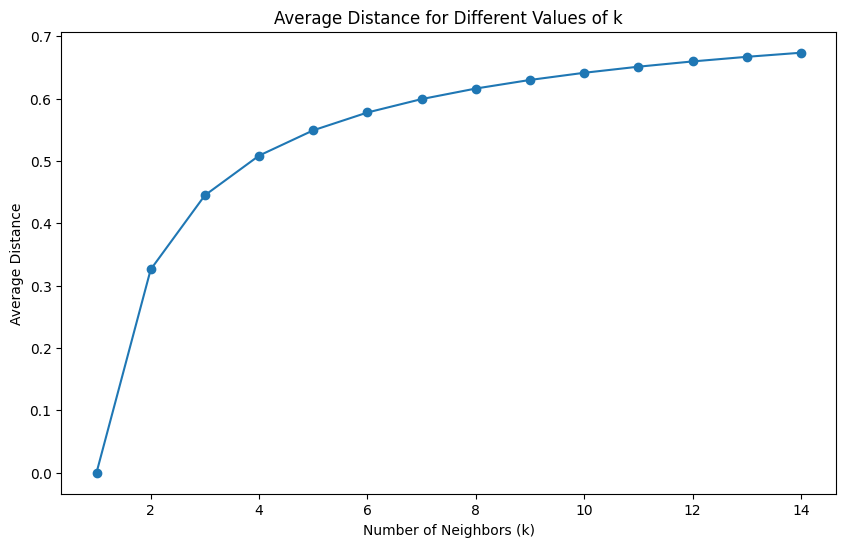

Best value of k: 1


In [16]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

# List of k values to test
k_values = list(range(1, 15))

# Metric to store the results
mean_distances = []

# Loop to find the best k
for k in k_values:
    model = NearestNeighbors(n_neighbors=k, metric='cosine')
    # model.fit(user_product_matrix)
    model.fit(R_train)
    
    # Compute the distances and indices of the nearest neighbors
    # distances, indices = model.kneighbors(user_product_matrix)
    distances, indices = model.kneighbors(R_train)
    
    # Calculate the average distance to the nearest neighbors
    mean_distance = np.mean(distances)
    mean_distances.append(mean_distance)

# Plotting the average distance metric for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_distances, marker='o')
plt.title('Average Distance for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Distance')
plt.grid(False)
plt.show()

# Find the best k (the one that minimizes the average distance)
best_k = k_values[np.argmin(mean_distances)]
print(f"Best value of k: {best_k}")

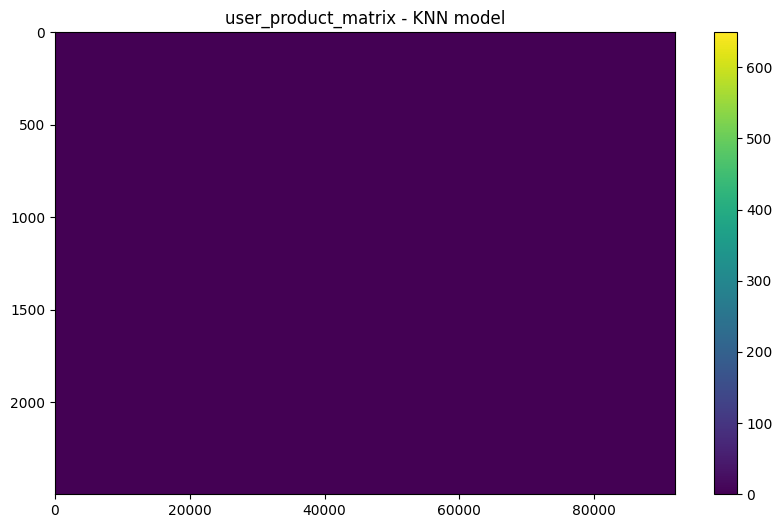

In [17]:
plt.figure(figsize=(10, 6))
plt.imshow(user_product_matrix, aspect='auto', cmap='viridis')
plt.title('user_product_matrix - KNN model')
plt.colorbar()
plt.show()

In [18]:
best_k = 1
model.fit(R_train)

NearestNeighbors(metric='cosine', n_neighbors=14)

In [19]:
model = NearestNeighbors(n_neighbors=best_k, metric='cosine')
model.fit(R_train)

NearestNeighbors(metric='cosine', n_neighbors=1)

In [20]:
print("Số features của model KNN:", model.n_features_in_)
print("Số features của dữ liệu input:", R_train.shape[1])


Số features của model KNN: 91969
Số features của dữ liệu input: 91969


In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Lấy danh sách các household trong tập test
test_indices = np.arange(len(R_test))

# Tìm k hàng xóm gần nhất cho tập test
distances, neighbors = model.kneighbors(R_test)

# Dự đoán bằng cách lấy trung bình có trọng số của hàng xóm
R_pred = np.zeros_like(R_test)

for i, neighbor_idxs in enumerate(neighbors):
    R_pred[i] = np.mean(R_train[neighbor_idxs], axis=0)

# Tính toán MSE và RMSE
mse = mean_squared_error(R_test, R_pred)
rmse = np.sqrt(mse)

mse, rmse


(0.40887005403994825, 0.6394294754231683)

In [22]:
def recommend_products_for_random_household_from_data(top_n=10):
    # Chọn ngẫu nhiên một household_key từ transaction_cleaned
    household_key = np.random.choice(transaction_cleaned['household_key'].unique())

    # Kiểm tra nếu household_key không có trong user_product_matrix
    if household_key not in user_product_matrix.index:
        print(f"Household key {household_key} không có trong user_product_matrix!")
        return

    # Lấy vector sản phẩm của household này
    selected_household_vector = user_product_matrix.loc[household_key].values.reshape(1, -1)

    # Tìm k hàng xóm gần nhất
    distances, neighbors = model.kneighbors(selected_household_vector)

    # Chuyển khoảng cách thành độ tương đồng
    similarities = 1 - distances

    # Lấy dữ liệu sản phẩm của hàng xóm
    weighted_product_scores = np.zeros(user_product_matrix.shape[1])

    for i, neighbor_idx in enumerate(neighbors[0]):  # Duyệt qua từng hàng xóm
        neighbor_purchases = R_train[neighbor_idx]  # Sản phẩm mà hàng xóm đã mua
        weighted_product_scores += neighbor_purchases * similarities[0, i]  # Trọng số theo Similarity

    # Chỉ lấy những sản phẩm mà household chưa mua
    household_purchases = user_product_matrix.loc[household_key].values
    recommended_product_ids = np.where((weighted_product_scores > 0) & (household_purchases == 0))[0]

    # Chọn 10 sản phẩm có điểm gợi ý cao nhất
    top_product_indices = recommended_product_ids[np.argsort(weighted_product_scores[recommended_product_ids])[::-1][:top_n]]

    # Lấy danh sách PRODUCT_ID
    recommended_product_ids = user_product_matrix.columns[top_product_indices]

    # Lấy thông tin chi tiết sản phẩm từ transaction_cleaned
    recommended_products = transaction_cleaned[transaction_cleaned['PRODUCT_ID'].isin(recommended_product_ids)][['PRODUCT_ID', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC']].drop_duplicates()

    # Gộp thông tin với điểm gợi ý
    recommended_products['RECOMMENDATION_SCORE'] = weighted_product_scores[top_product_indices]

    # Sắp xếp theo điểm gợi ý
    recommended_products = recommended_products.sort_values(by='RECOMMENDATION_SCORE', ascending=False)

    # Hiển thị kết quả
    print(f"Recommended products for randomly selected household: {household_key}")
    print(recommended_products.to_string(index=False))

# Gọi hàm để xem gợi ý cho một household ngẫu nhiên từ transaction_cleaned
recommend_products_for_random_household_from_data()


Recommended products for randomly selected household: 2176
Empty DataFrame
Columns: [PRODUCT_ID, COMMODITY_DESC, SUB_COMMODITY_DESC, RECOMMENDATION_SCORE]
Index: []
